In [1]:
# import 'Pandas'
import pandas as pd

# import 'Numpy'
import numpy as np

# import subpackage of Matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# import 'Seaborn'
import seaborn as sns

# to suppress warnings
from warnings import filterwarnings
filterwarnings('ignore')

# display all columns of the dataframe
pd.options.display.max_columns = None

# display all rows of the dataframe
pd.options.display.max_rows = None

# to display the float values upto 6 decimal places
pd.options.display.float_format = '{:.6f}'.format
# import train-test split
from sklearn.model_selection import train_test_split

# import StandardScaler to perform scaling
from sklearn.preprocessing import StandardScaler

# import various functions from sklearn
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB

# import the functions for visualizing the decision tree
#import pydotplus
#from IPython.display import Image

import random
from sklearn.datasets import make_classification
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import RFE
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_validate
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score

In [8]:
df=pd.read_csv("credit_train.csv")
df.head(2)

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,Fully Paid,445412.000000,Short Term,709.000000,1167493.000000,8 years,Home Mortgage,Home Improvements,5214.740000,17.200000,NaN,6.000000,1.000000,228190.000000,416746.000000,1.000000,0.000000
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,Fully Paid,262328.000000,Short Term,NaN,NaN,10+ years,Home Mortgage,Debt Consolidation,33295.980000,21.100000,8.000000,35.000000,0.000000,229976.000000,850784.000000,0.000000,0.000000


In [4]:
df.shape

(100514, 19)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100514 entries, 0 to 100513
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Loan ID                       100000 non-null  object 
 1   Customer ID                   100000 non-null  object 
 2   Loan Status                   100000 non-null  object 
 3   Current Loan Amount           100000 non-null  float64
 4   Term                          100000 non-null  object 
 5   Credit Score                  80846 non-null   float64
 6   Annual Income                 80846 non-null   float64
 7   Years in current job          95778 non-null   object 
 8   Home Ownership                100000 non-null  object 
 9   Purpose                       100000 non-null  object 
 10  Monthly Debt                  100000 non-null  float64
 11  Years of Credit History       100000 non-null  float64
 12  Months since last delinquent  46859 non-null

## Five point summary

In [6]:
df.describe()

,Current Loan Amount,Credit Score,Annual Income,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
count,100000.000000,80846.000000,80846.000000,100000.000000,100000.000000,46859.000000,100000.000000,100000.000000,100000.000000,99998.000000,99796.000000,99990.000000
mean,11760447.389460,1076.456089,1378276.559842,18472.412336,18.199141,34.901321,11.128530,0.168310,294637.382350,760798.381748,0.117740,0.029313
std,31783942.546071,1475.403791,1081360.195662,12174.992609,7.015324,21.997829,5.009870,0.482705,376170.934666,8384503.472368,0.351424,0.258182
min,10802.000000,585.000000,76627.000000,0.000000,3.600000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,179652.000000,705.000000,848844.000000,10214.162500,13.500000,16.000000,8.000000,0.000000,112670.000000,273438.000000,0.000000,0.000000
50%,312246.000000,724.000000,1174162.000000,16220.300000,16.900000,32.000000,10.000000,0.000000,209817.000000,467874.000000,0.000000,0.000000
75%,524942.000000,741.000000,1650663.000000,24012.057500,21.700000,51.000000,14.000000,0.000000,367958.750000,782958.000000,0.000000,0.000000
max,99999999.000000,7510.000000,165557393.000000,435843.280000,70.500000,176.000000,76.000000,15.000000,32878968.000000,1539737892.000000,7.000000,15.000000


In [9]:
data=df.copy() # A copy of orginal dataframe

In [10]:
# Encoding the categorical data
from sklearn.preprocessing import LabelEncoder

categorical_columns=data.select_dtypes(include=['object']).columns.tolist()
label_encoder=LabelEncoder()

for column in categorical_columns:
    data[column]=label_encoder.fit_transform(data[column])

## Check for outliers

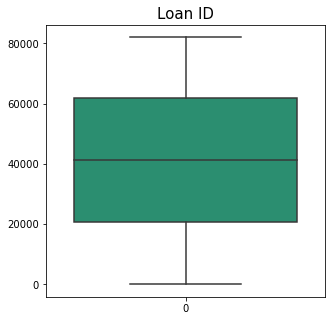

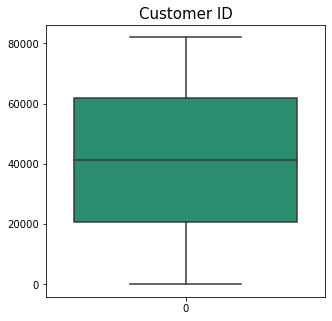

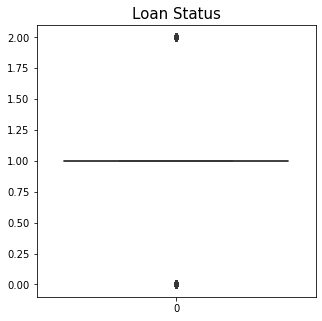

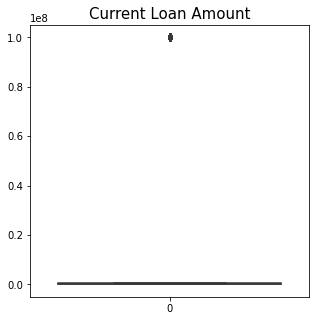

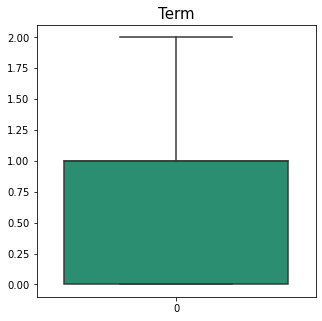

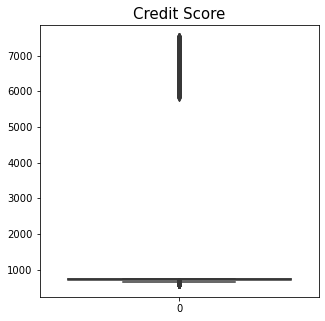

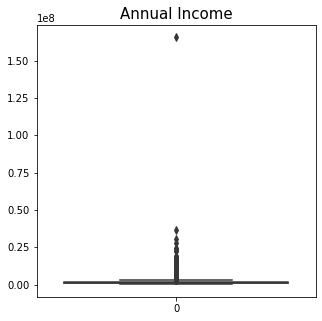

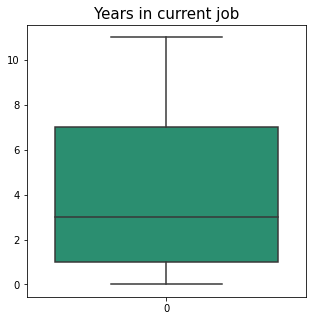

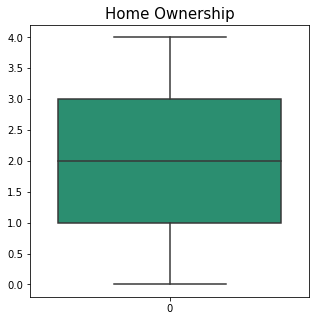

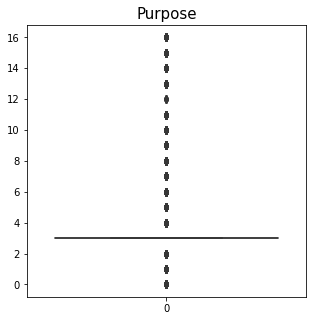

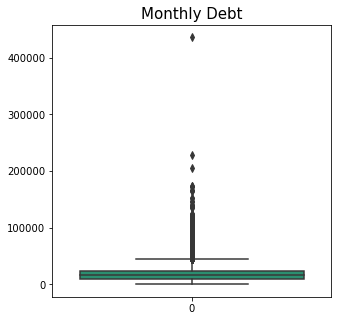

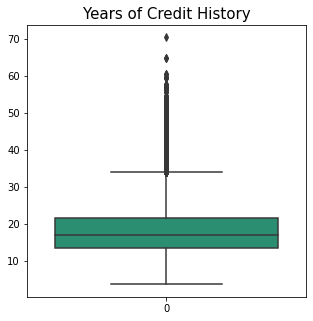

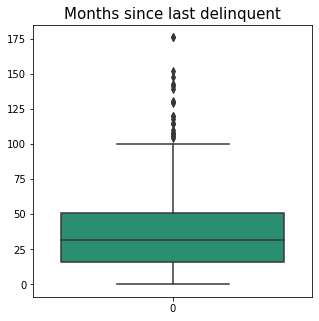

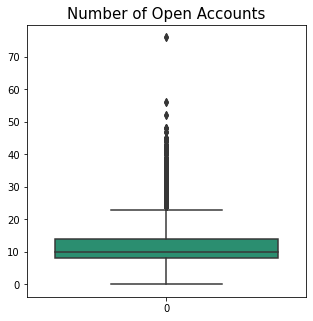

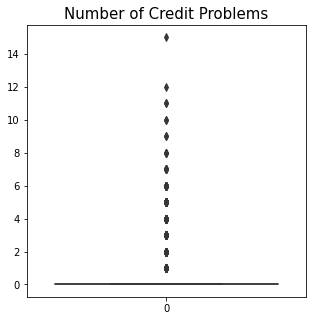

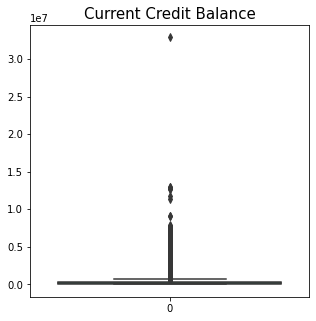

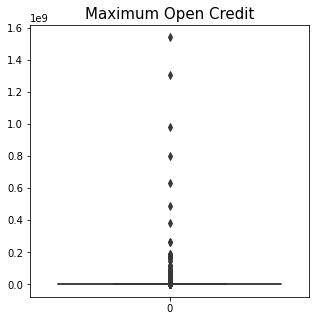

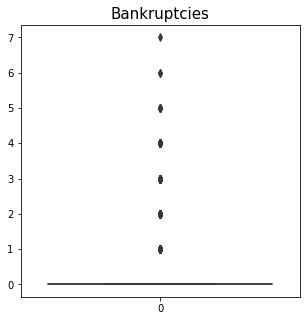

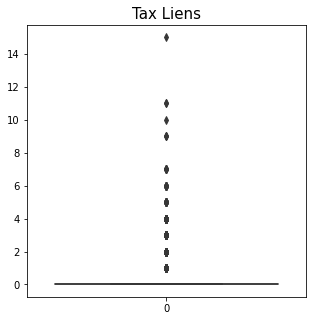

In [11]:
# Loop through all columns
for column in data.columns:
    plt.figure(figsize=(5, 5))
    plt.title(f"{column}", fontsize=15)
    sns.boxplot(data=data[column], palette="Dark2")
    plt.show()

## Univariate Analysis

<AxesSubplot:xlabel='Current Loan Amount'>

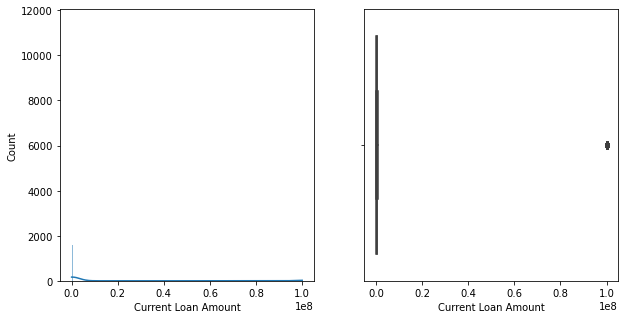

In [12]:
fig,axs = plt.subplots(nrows=1,ncols=2,figsize=(10,5))
sns.histplot(data['Current Loan Amount'],kde=True,ax=axs[0])
sns.boxplot(x='Current Loan Amount',data=data,ax=axs[1])

<AxesSubplot:xlabel='Term'>

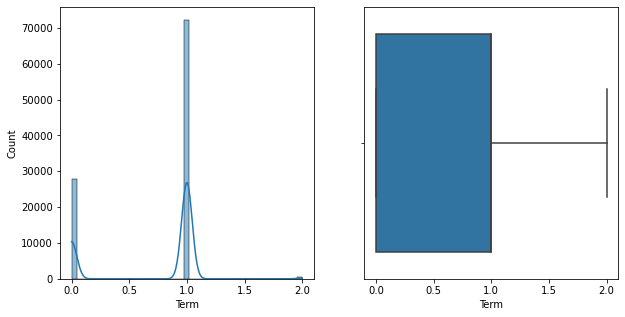

In [13]:
fig,axs=plt.subplots(nrows=1,ncols=2,figsize=(10,5))
sns.histplot(data['Term'],kde=True,ax=axs[0])
sns.boxplot(x='Term',data=data,ax=axs[1])

<AxesSubplot:xlabel='Credit Score'>

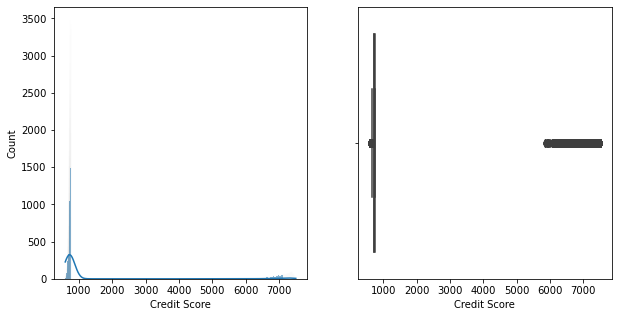

In [14]:
fig,axs=plt.subplots(nrows=1,ncols=2,figsize=(10,5))
sns.histplot(data['Credit Score'],kde=True,ax=axs[0])
sns.boxplot(x='Credit Score',data=data,ax=axs[1])

<AxesSubplot:xlabel='Annual Income'>

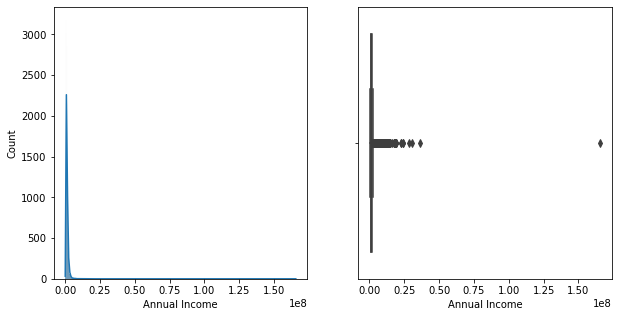

In [15]:
fig,axs=plt.subplots(nrows=1,ncols=2,figsize=(10,5))
sns.histplot(data['Annual Income'],kde=True,ax=axs[0])
sns.boxplot(x='Annual Income',data=data,ax=axs[1])

<AxesSubplot:xlabel='Years in current job'>

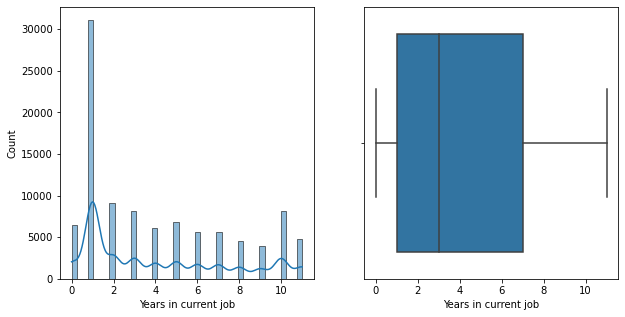

In [16]:
fig,axs=plt.subplots(nrows=1,ncols=2,figsize=(10,5))
sns.histplot(data['Years in current job'],kde=True,ax=axs[0])
sns.boxplot(x='Years in current job',data=data,ax=axs[1])

<AxesSubplot:xlabel='Home Ownership'>

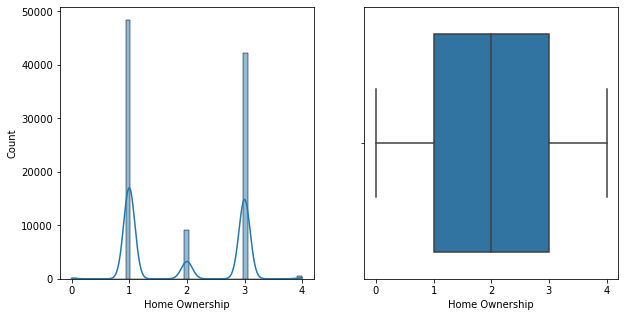

In [17]:
fig,axs=plt.subplots(nrows=1,ncols=2,figsize=(10,5))
sns.histplot(data['Home Ownership'],kde=True,ax=axs[0])
sns.boxplot(x='Home Ownership',data=data,ax=axs[1])

<AxesSubplot:xlabel='Purpose'>

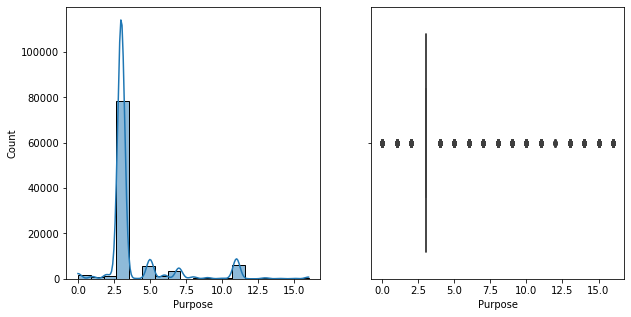

In [18]:
fig,axs=plt.subplots(nrows=1,ncols=2,figsize=(10,5))
sns.histplot(data['Purpose'],kde=True,ax=axs[0])
sns.boxplot(x='Purpose',data=data,ax=axs[1])

<AxesSubplot:xlabel='Monthly Debt'>

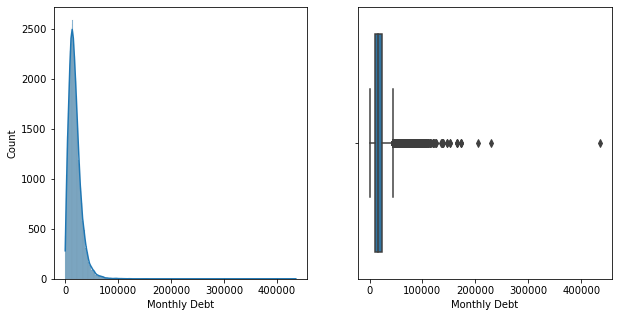

In [19]:
fig,axs=plt.subplots(nrows=1,ncols=2,figsize=(10,5))
sns.histplot(data['Monthly Debt'],kde=True,ax=axs[0])
sns.boxplot(x='Monthly Debt',data=data,ax=axs[1])

<AxesSubplot:xlabel='Years of Credit History'>

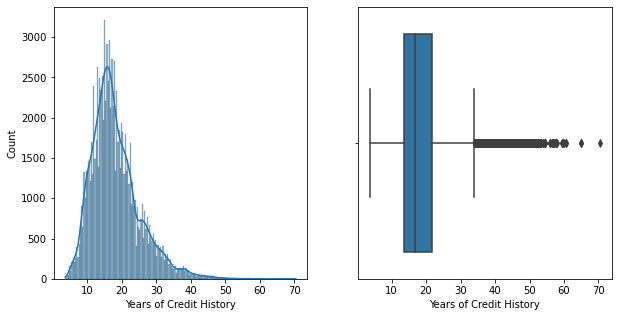

In [20]:
fig,axs=plt.subplots(nrows=1,ncols=2,figsize=(10,5))
sns.histplot(data['Years of Credit History'],kde=True,ax=axs[0])
sns.boxplot(x='Years of Credit History',data=data,ax=axs[1])

<AxesSubplot:xlabel='Number of Open Accounts'>

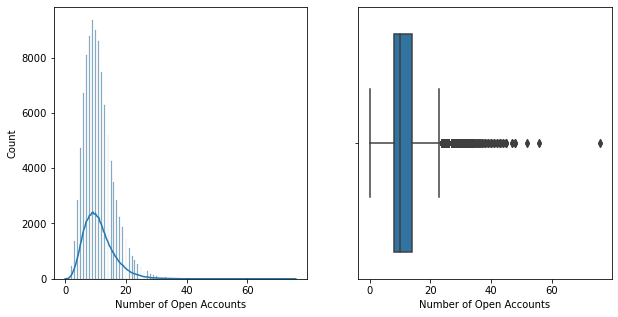

In [21]:
fig,axs=plt.subplots(nrows=1,ncols=2,figsize=(10,5))
sns.histplot(data['Number of Open Accounts'],kde=True,ax=axs[0])
sns.boxplot(x='Number of Open Accounts',data=data,ax=axs[1])

<AxesSubplot:xlabel='Current Credit Balance'>

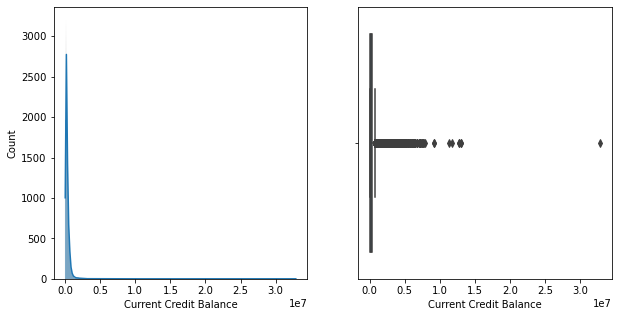

In [22]:
fig,axs=plt.subplots(nrows=1,ncols=2,figsize=(10,5))
sns.histplot(data['Current Credit Balance'],kde=True,ax=axs[0])
sns.boxplot(x='Current Credit Balance',data=data,ax=axs[1])

<AxesSubplot:xlabel='Maximum Open Credit'>

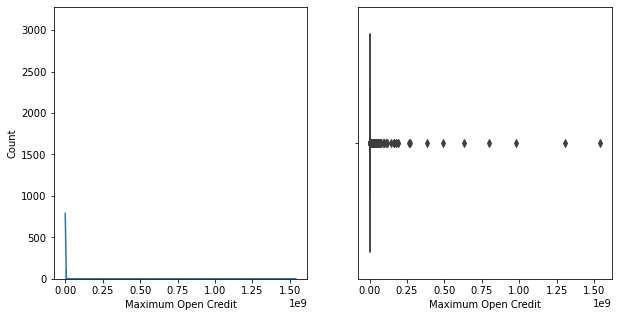

In [23]:
fig,axs=plt.subplots(nrows=1,ncols=2,figsize=(10,5))
sns.histplot(data['Maximum Open Credit'],kde=True,ax=axs[0])
sns.boxplot(x='Maximum Open Credit',data=data,ax=axs[1])

## Bivariate Analysis

<AxesSubplot:xlabel='Loan Status', ylabel='Current Loan Amount'>

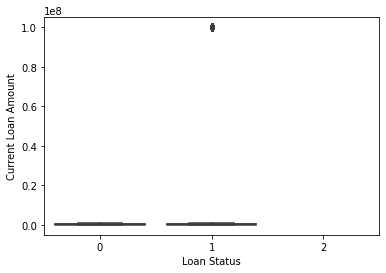

In [24]:
sns.boxplot(x='Loan Status',y='Current Loan Amount',data=data)

<AxesSubplot:xlabel='Loan Status', ylabel='Term'>

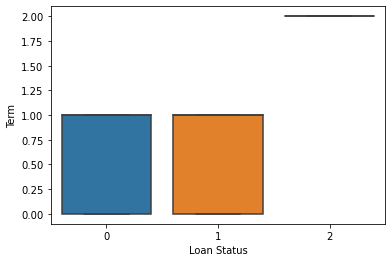

In [25]:
sns.boxplot(x='Loan Status',y='Term',data=data)

<AxesSubplot:xlabel='Loan Status', ylabel='Credit Score'>

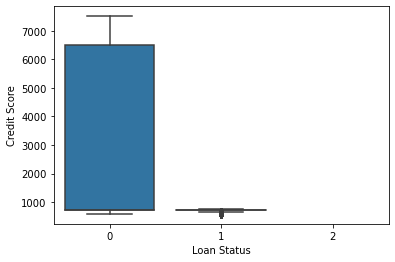

In [26]:
sns.boxplot(x='Loan Status',y='Credit Score',data=data)

<AxesSubplot:xlabel='Loan Status', ylabel='Annual Income'>

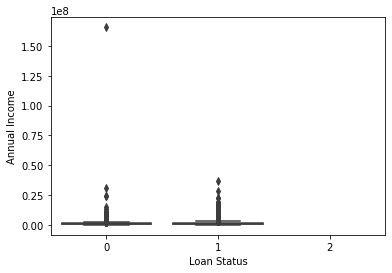

In [27]:
sns.boxplot(x='Loan Status',y='Annual Income',data=data)

<AxesSubplot:xlabel='Loan Status', ylabel='Years in current job'>

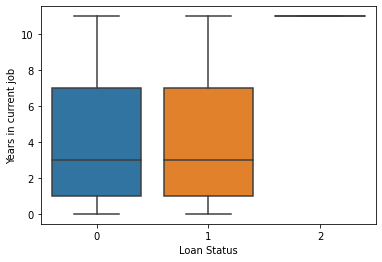

In [28]:
sns.boxplot(x='Loan Status',y='Years in current job',data=data)

<AxesSubplot:xlabel='Loan Status', ylabel='Home Ownership'>

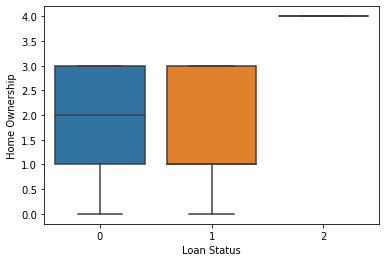

In [29]:
sns.boxplot(x='Loan Status',y='Home Ownership',data=data)

<AxesSubplot:xlabel='Loan Status', ylabel='Purpose'>

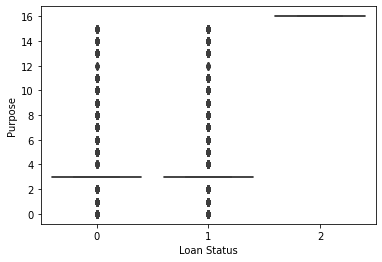

In [30]:
sns.boxplot(x='Loan Status',y='Purpose',data=data)

<AxesSubplot:xlabel='Loan Status', ylabel='Monthly Debt'>

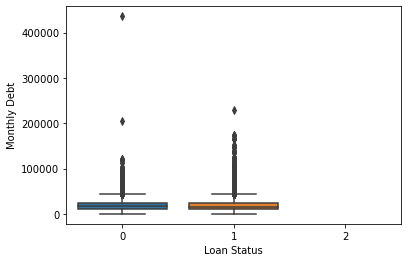

In [31]:
sns.boxplot(x='Loan Status',y='Monthly Debt',data=data)

<AxesSubplot:xlabel='Loan Status', ylabel='Years of Credit History'>

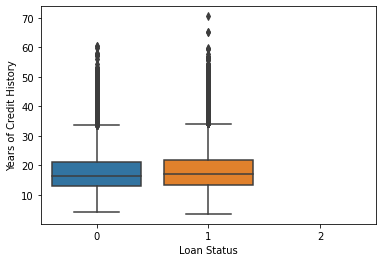

In [32]:
sns.boxplot(x='Loan Status',y='Years of Credit History',data=data)

<AxesSubplot:xlabel='Loan Status', ylabel='Number of Open Accounts'>

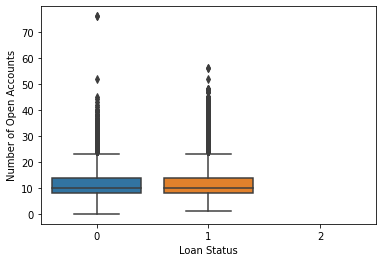

In [33]:
sns.boxplot(x='Loan Status',y='Number of Open Accounts',data=data)

<AxesSubplot:xlabel='Loan Status', ylabel='Current Credit Balance'>

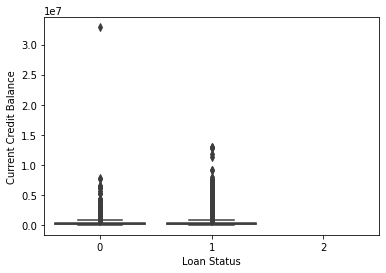

In [34]:
sns.boxplot(x='Loan Status',y='Current Credit Balance',data=data)

<AxesSubplot:xlabel='Loan Status', ylabel='Maximum Open Credit'>

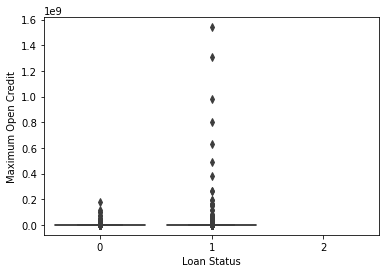

In [35]:
sns.boxplot(x='Loan Status',y='Maximum Open Credit',data=data)

## Multivariate Analysis

<AxesSubplot:>

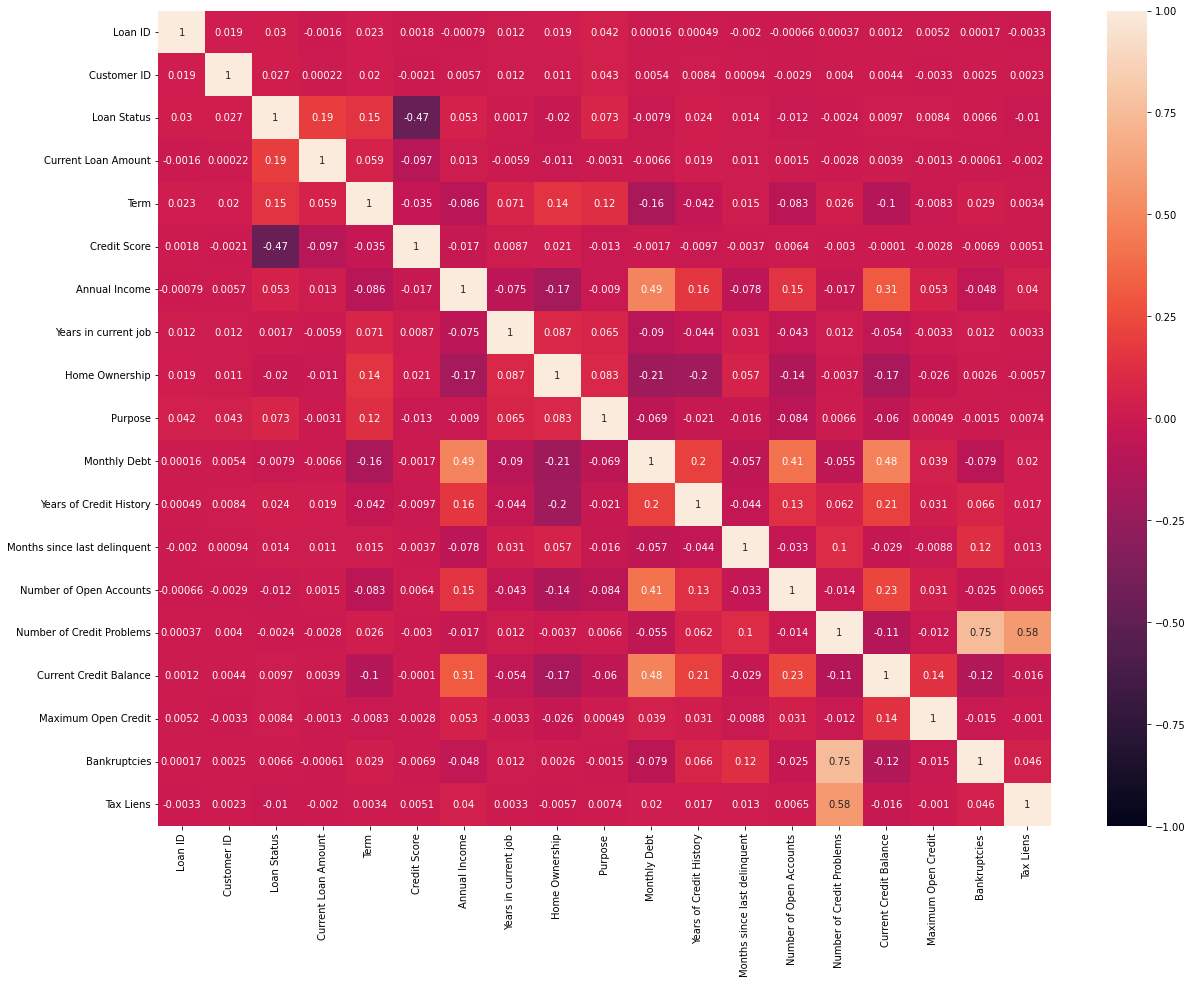

In [36]:
plt.figure(figsize=(20,15))
sns.heatmap(data.corr(),annot=True,vmin=-1,vmax=1)

## Data preprocessing

In [37]:
data.head()

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,6697,48724,1,445412.000000,1,709.000000,1167493.000000,8,1,5,5214.740000,17.200000,NaN,6.000000,1.000000,228190.000000,416746.000000,1.000000,0.000000
1,23041,14688,1,262328.000000,1,NaN,NaN,1,1,3,33295.980000,21.100000,8.000000,35.000000,0.000000,229976.000000,850784.000000,0.000000,0.000000
2,25441,30541,1,99999999.000000,1,741.000000,2231892.000000,8,2,3,29200.530000,14.900000,29.000000,18.000000,1.000000,297996.000000,750090.000000,0.000000,0.000000
3,38341,74173,1,347666.000000,0,721.000000,806949.000000,3,2,3,8741.900000,12.000000,NaN,9.000000,0.000000,256329.000000,386958.000000,0.000000,0.000000
4,68058,41470,1,176220.000000,1,NaN,NaN,5,3,3,20639.700000,6.100000,NaN,15.000000,0.000000,253460.000000,427174.000000,0.000000,0.000000


## Drop Duplicates

In [38]:
data.duplicated().sum()

10728

In [39]:
# Drop the duplicate records
data.drop_duplicates(inplace=True)

## Missing value Treatment

In [40]:
data.isnull().sum()

Loan ID                             0
Customer ID                         0
Loan Status                         0
Current Loan Amount                 1
Term                                0
Credit Score                    19155
Annual Income                   19155
Years in current job                0
Home Ownership                      0
Purpose                             0
Monthly Debt                        1
Years of Credit History             1
Months since last delinquent    48338
Number of Open Accounts             1
Number of Credit Problems           1
Current Credit Balance              1
Maximum Open Credit                 3
Bankruptcies                      191
Tax Liens                          10
dtype: int64

In [41]:
# remove null values less than  10
data.dropna(thresh=10,inplace=True)

In [42]:
data.drop('Months since last delinquent',axis=1,inplace=True)

In [43]:
##Linear interpolation is a method to estimate values between two known values by assuming a linear relationship between them
data['Credit Score'].interpolate(method='linear',inplace=True)

In [44]:
data['Annual Income']=data['Annual Income'].fillna(method='ffill')

In [45]:
mean_value=data['Bankruptcies'].mean()
data['Bankruptcies']=data['Bankruptcies'].fillna(mean_value)

In [46]:
data.dropna(subset=['Maximum Open Credit','Tax Liens'],inplace=True)

In [47]:
data.isnull().sum()

Loan ID                      0
Customer ID                  0
Loan Status                  0
Current Loan Amount          0
Term                         0
Credit Score                 0
Annual Income                0
Years in current job         0
Home Ownership               0
Purpose                      0
Monthly Debt                 0
Years of Credit History      0
Number of Open Accounts      0
Number of Credit Problems    0
Current Credit Balance       0
Maximum Open Credit          0
Bankruptcies                 0
Tax Liens                    0
dtype: int64

## Outlier Treatment

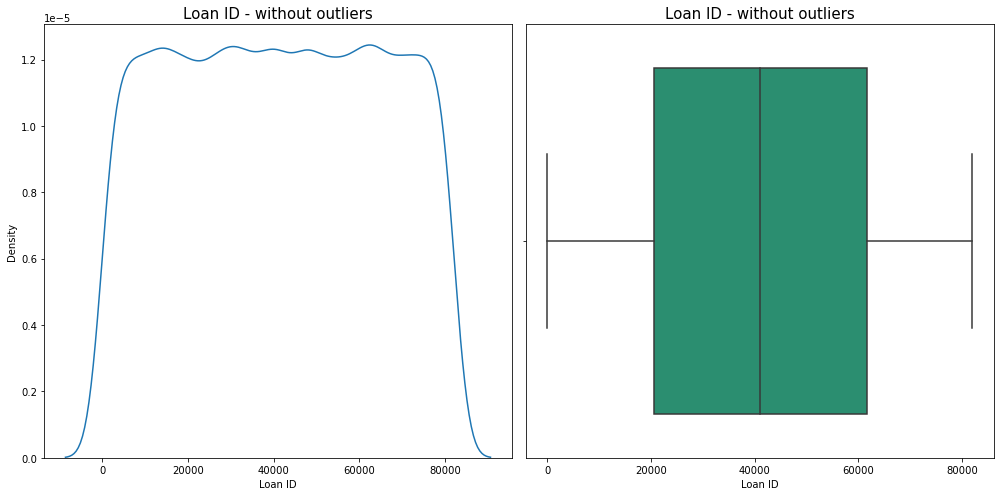

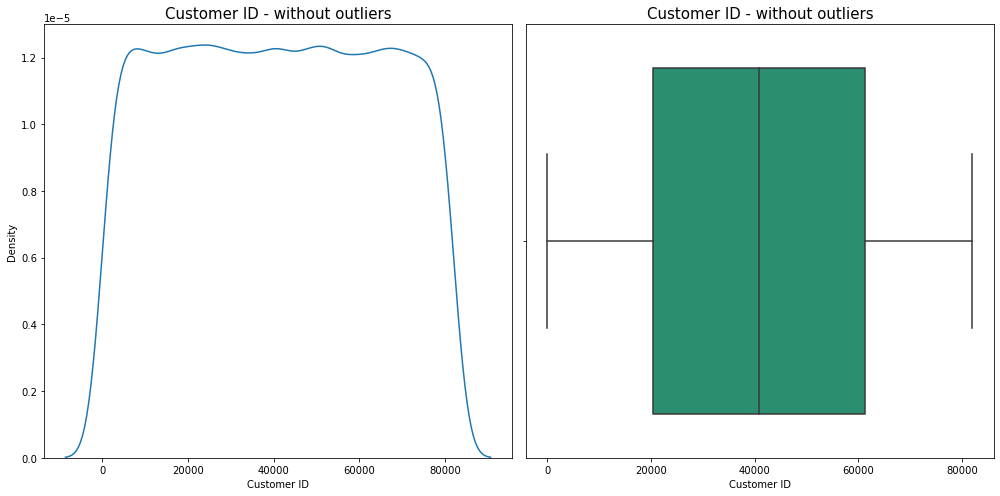

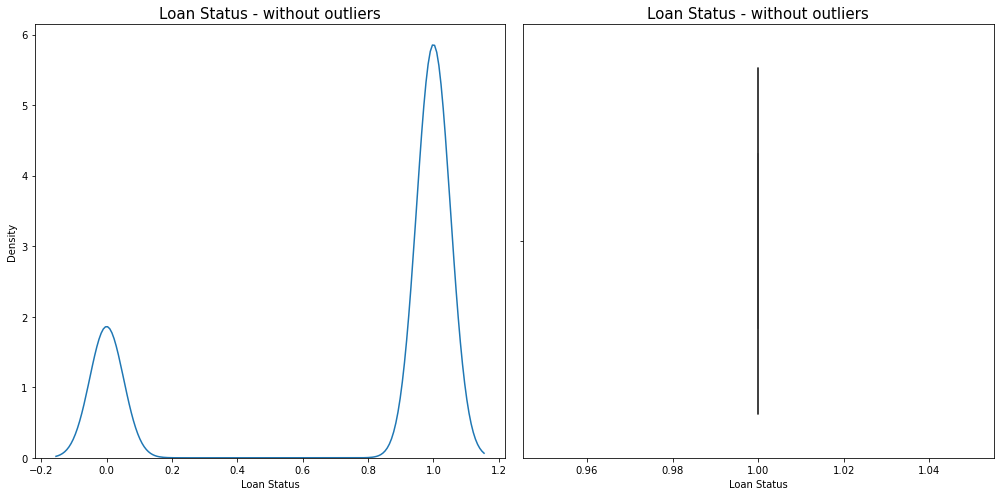

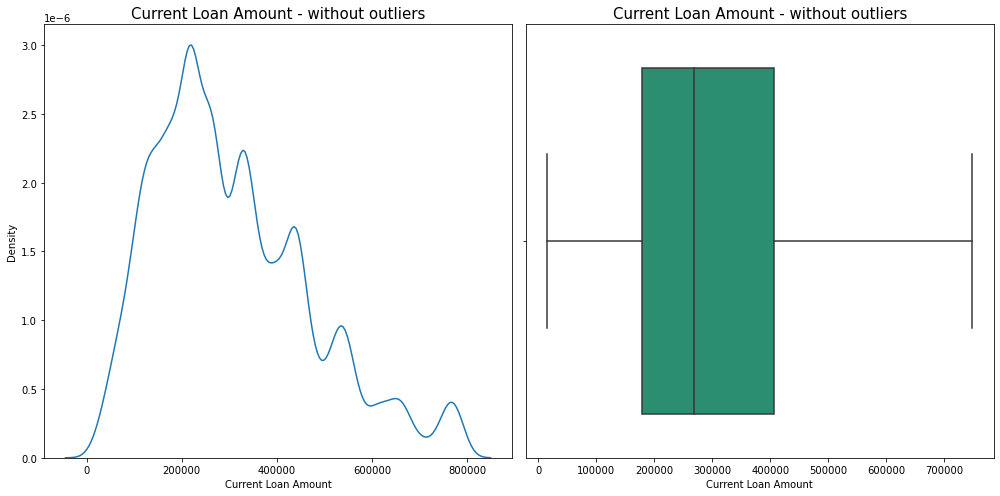

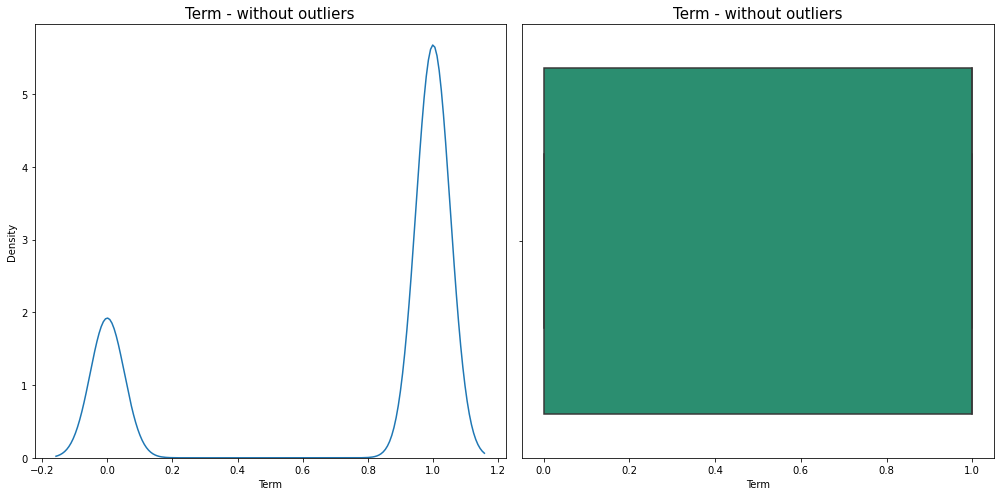

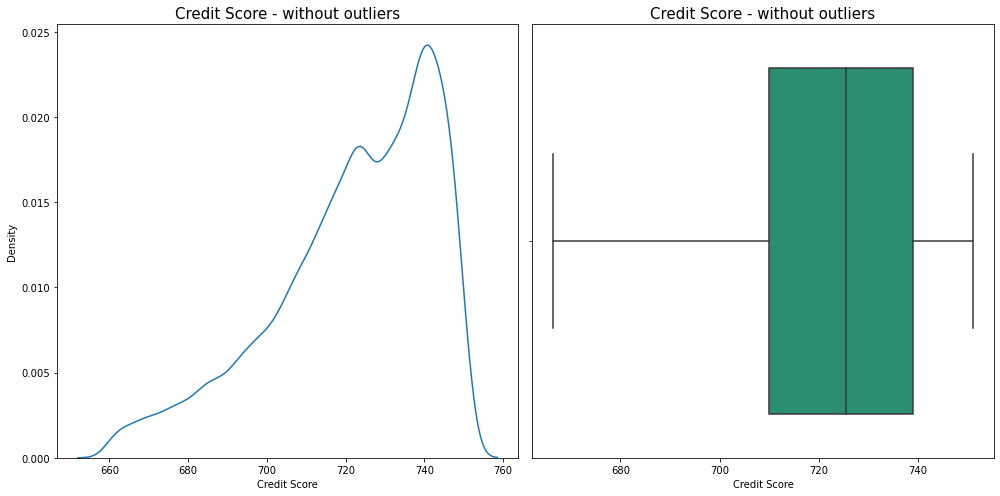

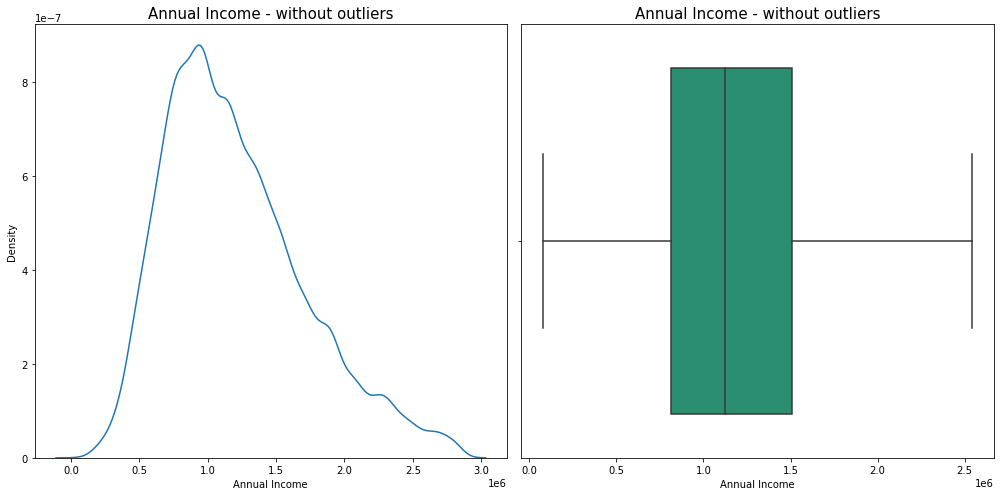

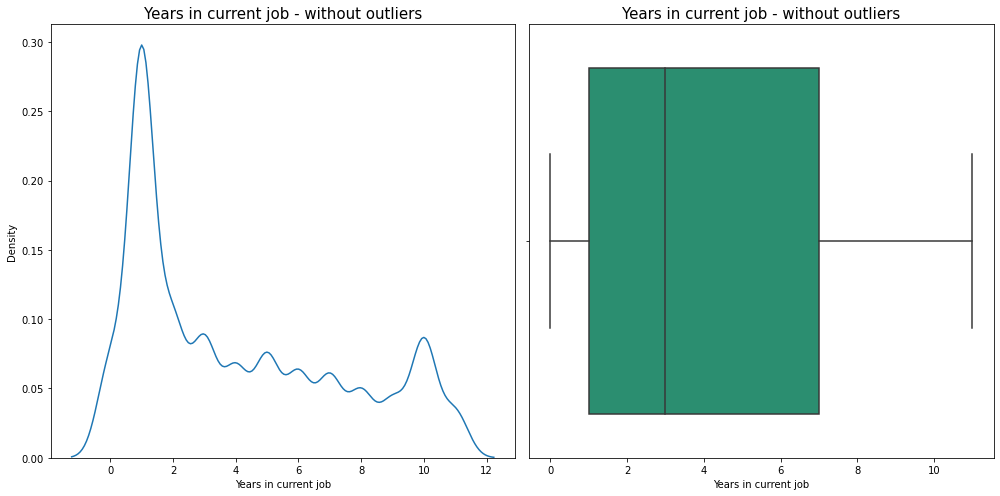

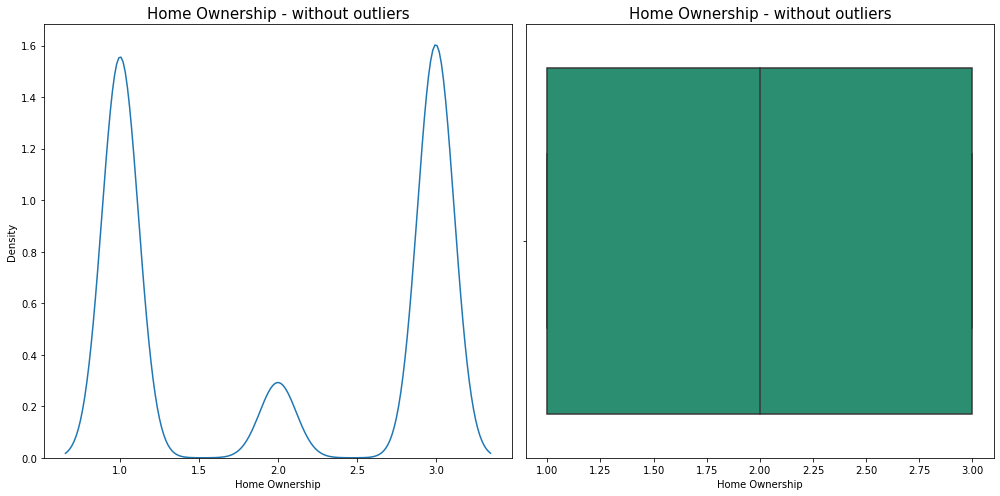

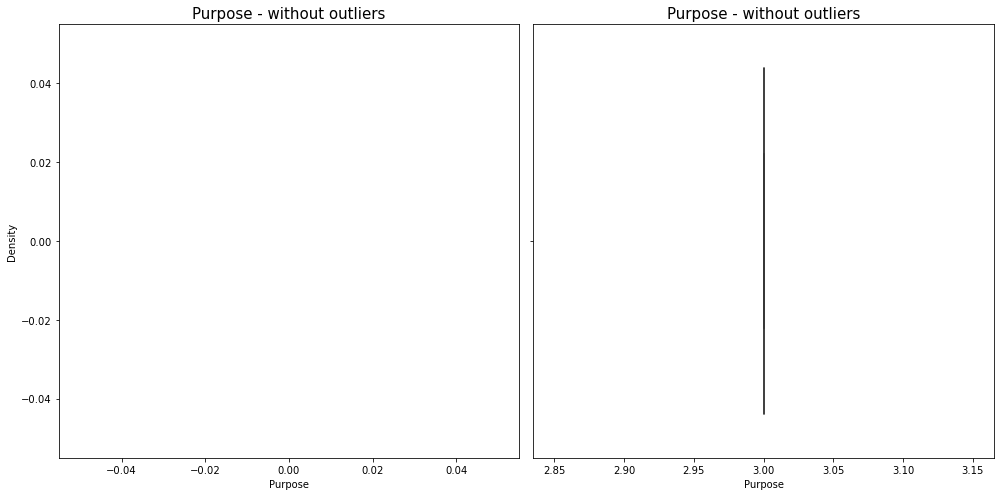

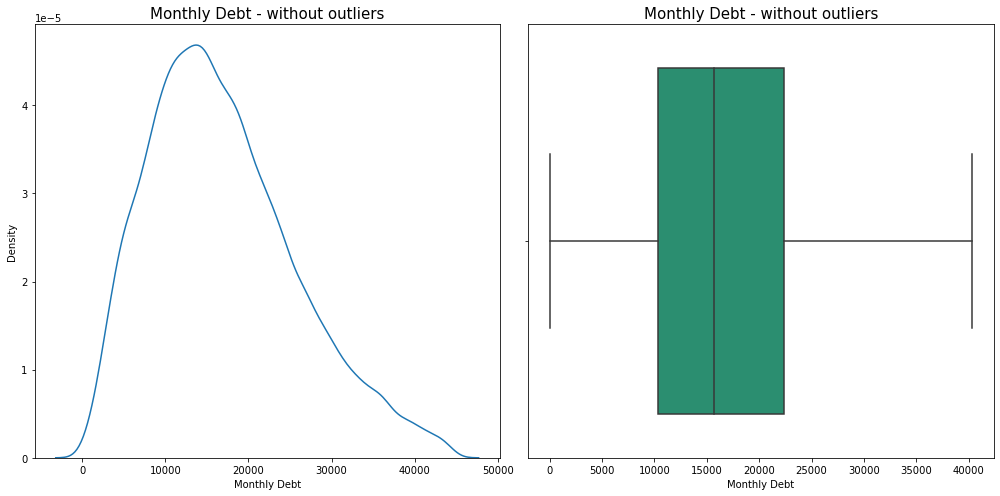

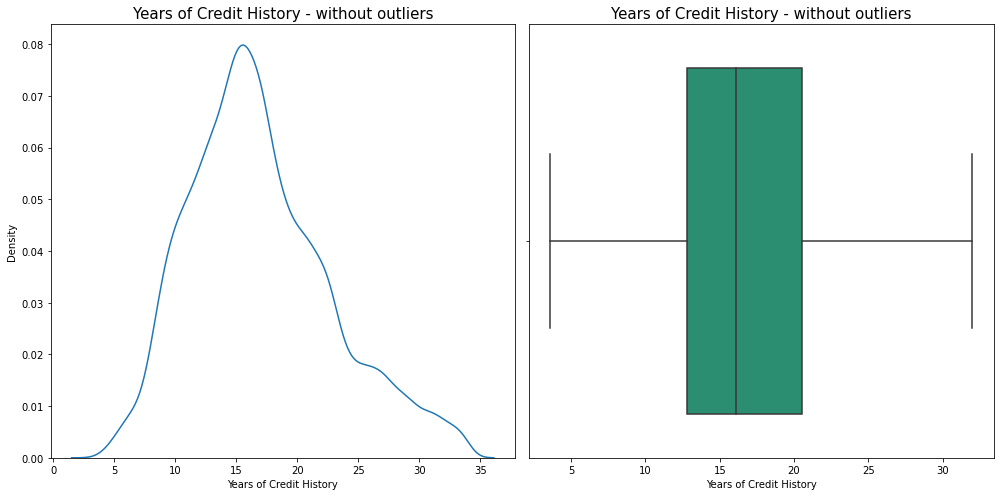

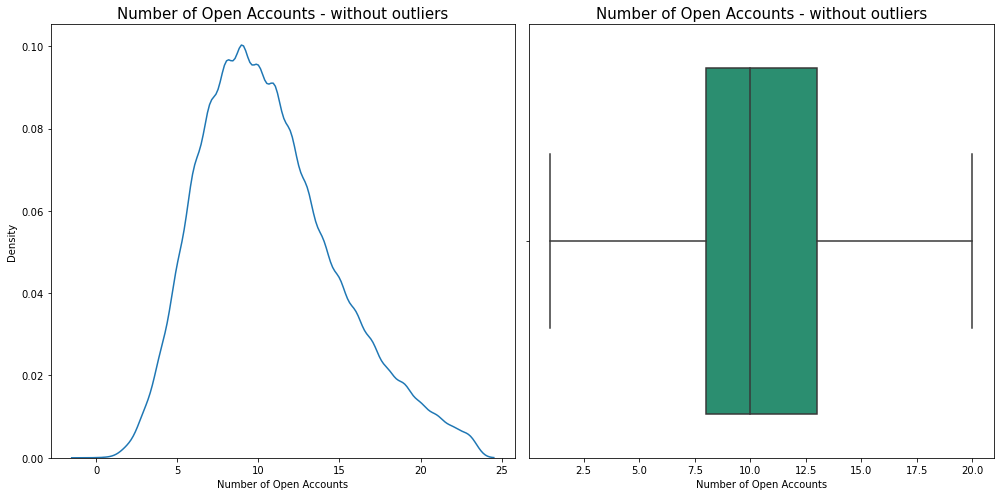

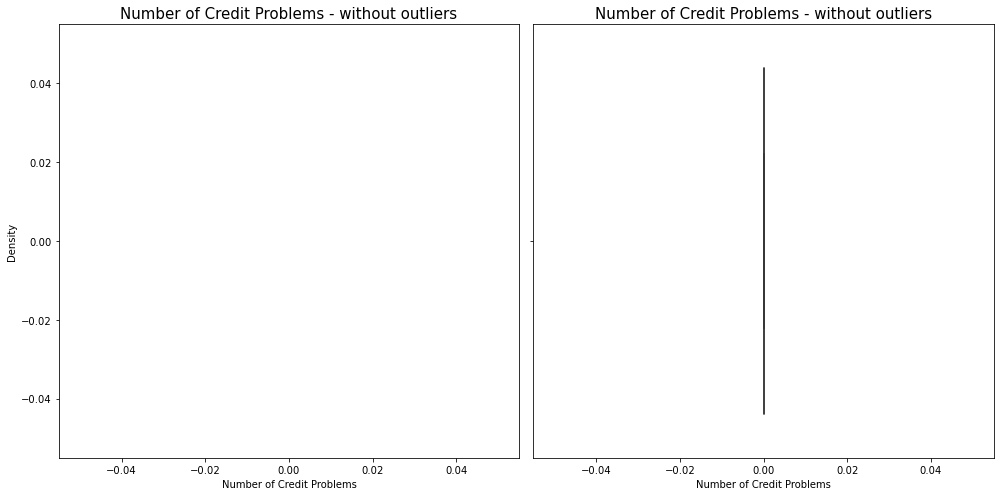

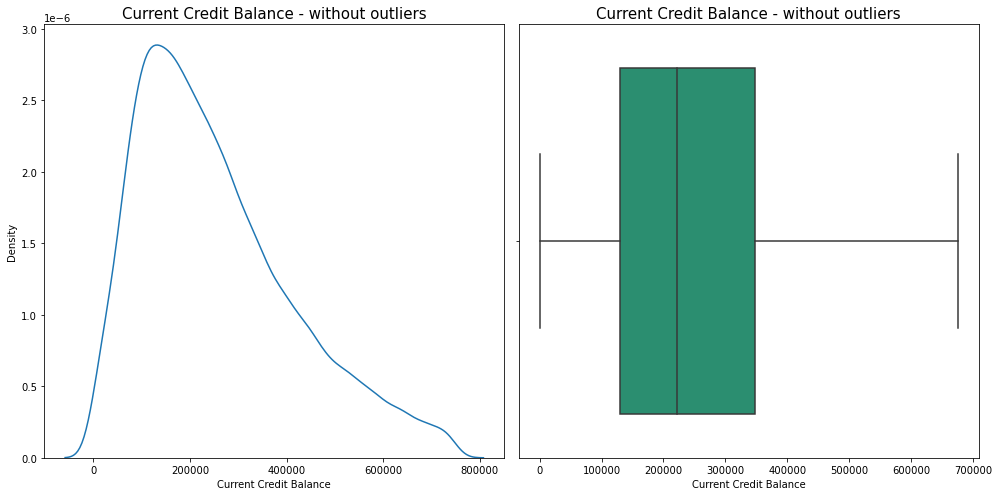

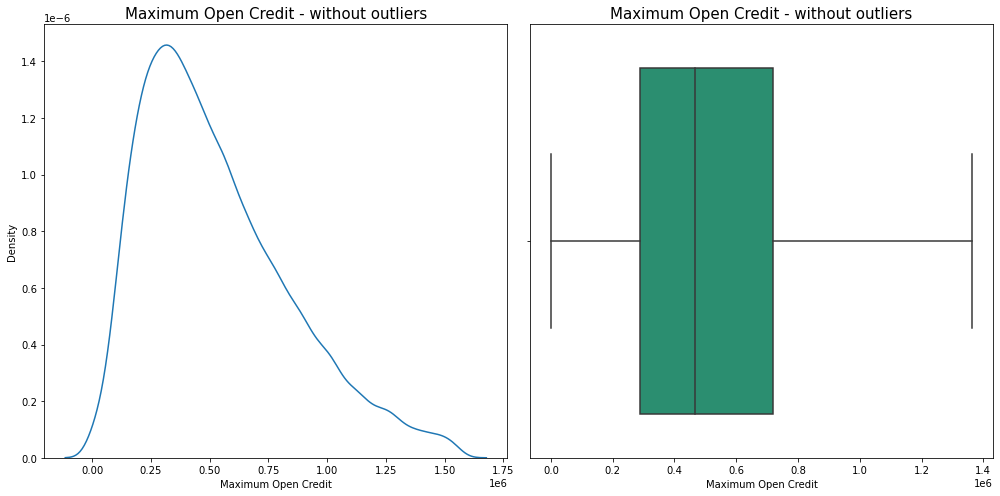

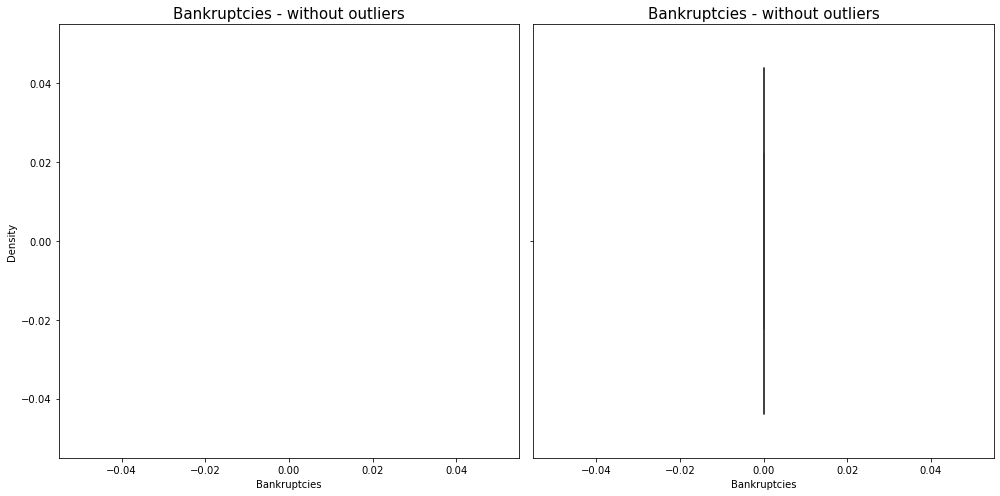

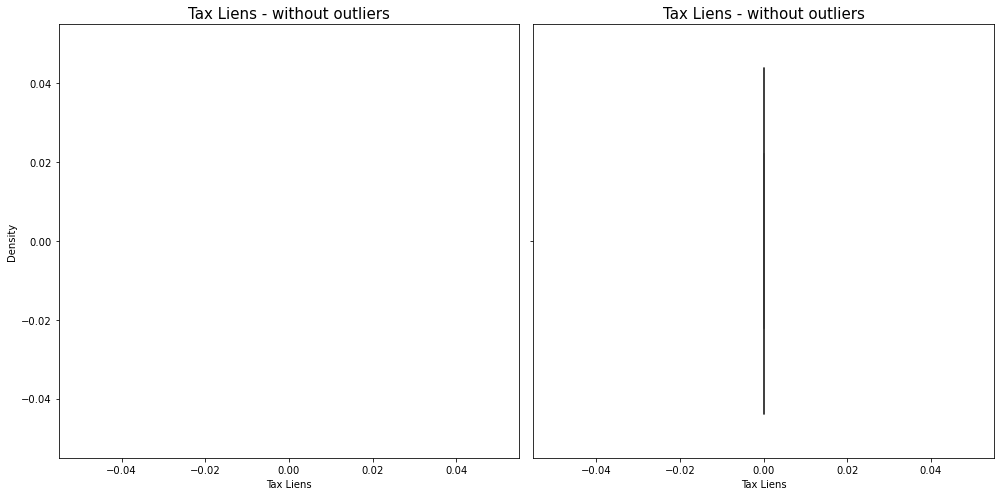

In [48]:
# Define a function to remove outliers using IQR for the entire DataFrame
def remove_outliers(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # Removes rows where any value in a row falls below the lower bound or above the upper bound using boolean indexing 
    return df[~((df < lower_bound) | (df > upper_bound)).any(axis=1)]


# Apply outlier removal function to the entire DataFrame
cleaned_data = remove_outliers(data)

# Visualize distributions after removing outliers (example with KDE and Boxplot)
for column in cleaned_data.columns:
    plt.figure(figsize=(14, 7))
    
    # Subplot 1: Kernel Density Estimation Plot (without outliers)
    plt.subplot(1, 2, 1)
    plt.title(f"{column} - without outliers", fontsize=15)
    sns.kdeplot(data=cleaned_data[column])
    
    # Subplot 2: Box Plot (original column, but with outliers not shown)
    plt.subplot(1, 2, 2)
    plt.title(f"{column} - without outliers", fontsize=15)
    sns.boxplot(data=cleaned_data, x=column, palette="Dark2", showfliers=False)
    
    plt.tight_layout()
    plt.show()

In [49]:
cleaned_data.head()

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
3,38341,74173,1,347666.000000,0,721.000000,806949.000000,3,2,3,8741.900000,12.000000,9.000000,0.000000,256329.000000,386958.000000,0.000000,0.000000
8,44651,56254,1,548746.000000,1,678.000000,2559110.000000,2,3,3,18660.280000,22.600000,4.000000,0.000000,437171.000000,555038.000000,0.000000,0.000000
9,3549,11312,1,215952.000000,1,739.000000,1454735.000000,10,3,3,39277.750000,13.900000,20.000000,0.000000,669560.000000,1021460.000000,0.000000,0.000000
15,40080,20100,1,449020.000000,0,725.666667,693234.000000,9,2,3,18904.810000,19.400000,8.000000,0.000000,334533.000000,428956.000000,0.000000,0.000000
16,64755,55056,0,653004.000000,0,724.333333,693234.000000,7,1,3,14537.090000,20.500000,9.000000,0.000000,302309.000000,413754.000000,0.000000,0.000000


## Feature Importance and Selection

In [50]:
X = cleaned_data.drop(['Loan Status'], axis = 1)
y = cleaned_data['Loan Status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=12)
Sc=StandardScaler()
X_train_Scaled=Sc.fit_transform(X_train)
X_test_Scaled=Sc.fit_transform(X_test)

Feature ranking:
1. feature 5 (0.101538)
2. feature 2 (0.099244)
3. feature 14 (0.098225)
4. feature 9 (0.096668)
5. feature 1 (0.096325)
6. feature 0 (0.094365)
7. feature 13 (0.094018)
8. feature 10 (0.091786)
9. feature 4 (0.089652)
10. feature 11 (0.061575)
11. feature 6 (0.048186)
12. feature 7 (0.015021)
13. feature 3 (0.013397)
14. feature 16 (0.000000)
15. feature 15 (0.000000)
16. feature 12 (0.000000)
17. feature 8 (0.000000)


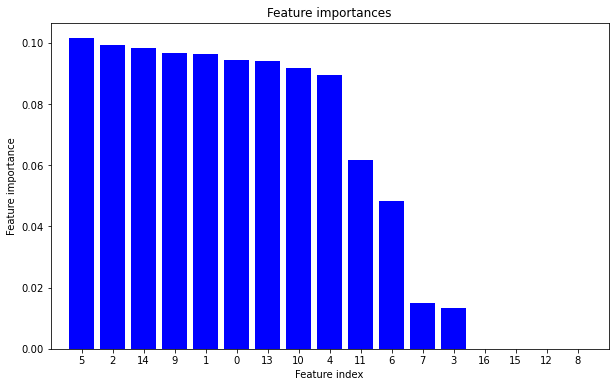

In [51]:
# Initialize Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Fit classifier to the data
rf_classifier.fit(X_train_Scaled,y_train)

# Get feature importances
feature_importances = rf_classifier.feature_importances_

# Sort feature importances in descending order
indices = np.argsort(feature_importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X_train_Scaled.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], feature_importances[indices[f]]))

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature importances")
plt.bar(range(X_train_Scaled.shape[1]), feature_importances[indices],
        color="b", align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.xlabel("Feature index")
plt.ylabel("Feature importance")
plt.show()

## Statistical Tests

# One-Way ANOVA Test:
    Purpose: To compare means across two or more independent groups.
    Example Scenario: Comparing the average scores of students from three different teaching methods.
    

#  Hypotheses:

    Null Hypothesis (H0): The means of the two groups are equal.
    Alternative Hypothesis (H1): The means of the two groups are not equal.

In [52]:
# Get updated numerical columns
numerical_columns =cleaned_data.select_dtypes(include='number')

In [53]:
import scipy.stats as stats
target_column = 'Loan Status'

# List to store ANOVA results
anova_results = []

# Perform one-way ANOVA for each numerical column
for numerical_column in numerical_columns:
    # Extract data for each category of 'Loan Status'
    loan_status_groups = [cleaned_data[numerical_column][cleaned_data[target_column] == status] for status in cleaned_data[target_column].unique()]

    # Perform ANOVA
    f_stat, p_value = stats.f_oneway(*loan_status_groups)

    # Append results to the list
    anova_results.append({
        'Numerical_Column': numerical_column,
        'F-Statistic': f_stat,
        'P-Value': p_value
    })

# Convert results to a DataFrame for easier interpretation
anova_results_df = pd.DataFrame(anova_results)

# Display ANOVA results
print(anova_results_df)

             Numerical_Column  F-Statistic  P-Value
0                     Loan ID     3.879113 0.048897
1                 Customer ID     0.352158 0.552898
2                 Loan Status          inf 0.000000
3         Current Loan Amount    53.404165 0.000000
4                        Term   578.719973 0.000000
5                Credit Score   428.134041 0.000000
6               Annual Income   161.528436 0.000000
7        Years in current job    20.242202 0.000007
8              Home Ownership    83.546725 0.000000
9                     Purpose          NaN      NaN
10               Monthly Debt    12.015581 0.000528
11    Years of Credit History    21.022232 0.000005
12    Number of Open Accounts    10.771049 0.001032
13  Number of Credit Problems          NaN      NaN
14     Current Credit Balance     0.920399 0.337376
15        Maximum Open Credit    86.682138 0.000000
16               Bankruptcies          NaN      NaN
17                  Tax Liens          NaN      NaN


In [54]:
for i in numerical_columns:
    print(i, cleaned_data.groupby('Loan Status')[i].describe())

Loan ID                    count         mean          std       min          25%  \
Loan Status                                                                 
0            9380.000000 40657.146695 23584.623200 22.000000 20354.500000   
1           29537.000000 41208.671564 23640.815288  0.000000 20661.000000   

                     50%          75%          max  
Loan Status                                         
0           40615.500000 61072.500000 81989.000000  
1           41166.000000 61719.000000 81997.000000  
Customer ID                    count         mean          std       min          25%  \
Loan Status                                                                 
0            9380.000000 40755.030384 23484.652206 10.000000 20503.250000   
1           29537.000000 40921.172123 23666.038885  0.000000 20426.000000   

                     50%          75%          max  
Loan Status                                         
0           40544.500000 61378.250000 81990.

# Inferences: Numarical columns 
    the above statistical tests and describing the data values we came to a conclusion that 
    Tax Liens , Bankruptcies , Maximum Open Credit , Maximum Open Credit ,Loan id,customer id, Current Credit Balance has there is no such  effects  on Loan status , 
    Loan status might get effected for several other factors like - Current Loan Amount ,Credit Score ,Annual Income,               Monthly  Debt, Years of Credit History which has been proved by statisical tests .
 # Hence removing this features 

In [55]:
columns_to_drop = ['Tax Liens', 'Bankruptcies', 'Maximum Open Credit', 'Current Credit Balance','Loan ID','Customer ID']

# Drop the specified columns from the DataFrame
new_data = cleaned_data.drop(columns=columns_to_drop)

In [56]:
new_data.head()

,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems
3,1,347666.000000,0,721.000000,806949.000000,3,2,3,8741.900000,12.000000,9.000000,0.000000
8,1,548746.000000,1,678.000000,2559110.000000,2,3,3,18660.280000,22.600000,4.000000,0.000000
9,1,215952.000000,1,739.000000,1454735.000000,10,3,3,39277.750000,13.900000,20.000000,0.000000
15,1,449020.000000,0,725.666667,693234.000000,9,2,3,18904.810000,19.400000,8.000000,0.000000
16,0,653004.000000,0,724.333333,693234.000000,7,1,3,14537.090000,20.500000,9.000000,0.000000


In [57]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38917 entries, 3 to 99998
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Loan Status                38917 non-null  int32  
 1   Current Loan Amount        38917 non-null  float64
 2   Term                       38917 non-null  int32  
 3   Credit Score               38917 non-null  float64
 4   Annual Income              38917 non-null  float64
 5   Years in current job       38917 non-null  int32  
 6   Home Ownership             38917 non-null  int32  
 7   Purpose                    38917 non-null  int32  
 8   Monthly Debt               38917 non-null  float64
 9   Years of Credit History    38917 non-null  float64
 10  Number of Open Accounts    38917 non-null  float64
 11  Number of Credit Problems  38917 non-null  float64
dtypes: float64(7), int32(5)
memory usage: 3.1 MB


In [58]:
new_data.shape

(38917, 12)

In [59]:
cleaned_data.groupby('Term')['Loan Status'].value_counts(normalize = True)*100

Term  Loan Status
0     1             66.998578
      0             33.001422
1     1             78.909716
      0             21.090284
Name: Loan Status, dtype: float64

In [60]:
cleaned_data.groupby('Years in current job')['Loan Status'].value_counts(normalize = True)*100

Years in current job  Loan Status
0                     1             76.025836
                      0             23.974164
1                     1             76.317608
                      0             23.682392
2                     1             76.695605
                      0             23.304395
3                     1             78.365089
                      0             21.634911
4                     1             76.562500
                      0             23.437500
5                     1             75.543672
                      0             24.456328
6                     1             74.750109
                      0             25.249891
7                     1             76.318141
                      0             23.681859
8                     1             74.986286
                      0             25.013714
9                     1             74.582798
                      0             25.417202
10                    1             75.518797


In [61]:
cleaned_data.groupby('Home Ownership')['Loan Status'].value_counts(normalize = True)*100

Home Ownership  Loan Status
1               1             78.006383
                0             21.993617
2               1             75.804493
                0             24.195507
3               1             73.867345
                0             26.132655
Name: Loan Status, dtype: float64

In [62]:
cleaned_data.groupby('Purpose')['Loan Status'].value_counts(normalize = True)*100

Purpose  Loan Status
3        1             75.897423
         0             24.102577
Name: Loan Status, dtype: float64

## Base Model

In [63]:
X = new_data.drop(['Loan Status'], axis = 1)
y = new_data['Loan Status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=12)

In [64]:
Sc=StandardScaler()
X_train_Scaled=Sc.fit_transform(X_train)
X_test_Scaled=Sc.fit_transform(X_test)

In [65]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train_Scaled, y_train)
pred = model.predict(X_test_Scaled)

print('train accuracy:', model.score(X_train_Scaled, y_train))
print('test accuracy:', model.score(X_test_Scaled, y_test))

train accuracy: 0.7574611798392129
test accuracy: 0.7624186365193559


In [66]:
# print classification report 
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      2768
           1       0.76      1.00      0.87      8908

    accuracy                           0.76     11676
   macro avg       0.38      0.50      0.43     11676
weighted avg       0.58      0.76      0.66     11676



<AxesSubplot:ylabel='Frequency'>

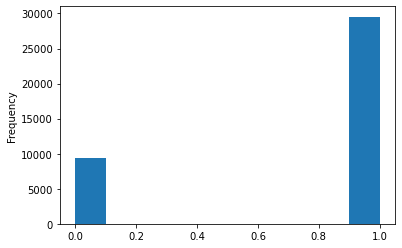

In [67]:
# plotting target column
new_data['Loan Status'].plot.hist(bins=10)

## Oversampling

In [ ]:
pip install imbalanced-learn

In [71]:
from imblearn.over_sampling import SMOTE
X, y = SMOTE().fit_resample(X, y)
from collections import Counter
print(sorted(Counter(y).items()))

[(0, 29537), (1, 29537)]


## Final Model

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=12)

In [73]:
Sc=StandardScaler()
X_train_Scaled=Sc.fit_transform(X_train)
X_test_Scaled=Sc.fit_transform(X_test)

## Logistic Regression

In [74]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train_Scaled, y_train)
pred = model.predict(X_test_Scaled)

print('train accuracy:', model.score(X_train_Scaled, y_train))
print('test accuracy:', model.score(X_test_Scaled, y_test))

train accuracy: 0.6222340451258737
test accuracy: 0.6211138069175648


In [75]:
# print classification report 
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.66      0.50      0.57      8837
           1       0.60      0.74      0.66      8886

    accuracy                           0.62     17723
   macro avg       0.63      0.62      0.62     17723
weighted avg       0.63      0.62      0.62     17723



## Naive Bayes Model

In [76]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train_Scaled,y_train)
pred = model.predict(X_test_Scaled)

print('accuracy train :', model.score(X_train_Scaled, y_train))
print('accuracy test :', model.score(X_test_Scaled, y_test))

accuracy train : 0.6250392977195232
accuracy test : 0.6233707611578175


In [77]:
# print classification report 
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.66      0.51      0.57      8837
           1       0.60      0.74      0.66      8886

    accuracy                           0.62     17723
   macro avg       0.63      0.62      0.62     17723
weighted avg       0.63      0.62      0.62     17723



## K Neighbours Model

In [78]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train_Scaled,y_train)
pred = model.predict(X_test_Scaled)

print('accuracy train :', model.score(X_train_Scaled, y_train))
print('accuracy test :', model.score(X_test_Scaled, y_test))

accuracy train : 0.7833909699886339
accuracy test : 0.6676634881227783


In [79]:
# print classification report 
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.65      0.72      0.68      8837
           1       0.69      0.61      0.65      8886

    accuracy                           0.67     17723
   macro avg       0.67      0.67      0.67     17723
weighted avg       0.67      0.67      0.67     17723



## Decision Tree

In [80]:
from sklearn.tree import DecisionTreeClassifier
dt_default = DecisionTreeClassifier()
dt_default.fit(X_train_Scaled, y_train)

DecisionTreeClassifier()

In [81]:
# Making predictions
y_pred_default = dt_default.predict(X_test_Scaled)

# Printing classification report
print(classification_report(y_test, y_pred_default))

              precision    recall  f1-score   support

           0       0.53      0.93      0.67      8837
           1       0.71      0.17      0.27      8886

    accuracy                           0.55     17723
   macro avg       0.62      0.55      0.47     17723
weighted avg       0.62      0.55      0.47     17723



## Random Forest

In [82]:
from sklearn.ensemble import RandomForestClassifier
RF=RandomForestClassifier(n_jobs=-1)
RF.fit(X_train_Scaled, y_train)
y_pred_RF = RF.predict(X_test_Scaled)
print(classification_report(y_test, y_pred_RF))

              precision    recall  f1-score   support

           0       0.64      0.84      0.73      8837
           1       0.77      0.54      0.63      8886

    accuracy                           0.69     17723
   macro avg       0.71      0.69      0.68     17723
weighted avg       0.71      0.69      0.68     17723



## Hyperparameter Tuning

In [83]:
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
param_grid = {
    'criterion': ['gini', 'entropy'],  # Split criterion
    'splitter': ['best', 'random'],    # Strategy used to split at each node
    'max_depth': [None, 5, 10, 15],     # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],    # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2, 4],      # Minimum number of samples required at each leaf node
    'max_features': ['auto', 'sqrt', 'log2', None],  # Number of features to consider for the best split
    'random_state': [42]                # Random state for reproducibility
}
n_folds = 5

# Instantiate the grid search model
dtree = DecisionTreeClassifier()
grid_search = GridSearchCV(estimator = dtree, param_grid = param_grid, 
                          cv = n_folds, verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_train_Scaled,y_train)

Fitting 5 folds for each of 576 candidates, totalling 2880 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 5, 10, 15],
                         'max_features': ['auto', 'sqrt', 'log2', None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10], 'random_state': [42],
                         'splitter': ['best', 'random']},
             verbose=1)

In [84]:
# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results.sort_values('mean_test_score', ascending=False)[0:5]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_max_features,param_min_samples_leaf,param_min_samples_split,param_random_state,param_splitter,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
342,1.526118,0.098295,0.005177,0.000457,entropy,None,None,1,2,42,best,"{'criterion': 'entropy', 'max_depth': None, 'm...",0.733889,0.734341,0.709553,0.737727,0.700121,0.723126,0.015286,1
54,1.307221,0.343085,0.012628,0.016447,gini,None,None,1,2,42,best,"{'criterion': 'gini', 'max_depth': None, 'max_...",0.725184,0.719710,0.726481,0.737848,0.699274,0.721700,0.012670,2
344,1.460921,0.087367,0.006525,0.002890,entropy,None,None,1,5,42,best,"{'criterion': 'entropy', 'max_depth': None, 'm...",0.730746,0.729867,0.708222,0.733857,0.693108,0.719160,0.015895,3
358,1.405837,0.076605,0.007222,0.003059,entropy,None,None,4,10,42,best,"{'criterion': 'entropy', 'max_depth': None, 'm...",0.729295,0.725635,0.700605,0.738331,0.690568,0.716887,0.018156,4
56,0.815279,0.009210,0.003429,0.001040,gini,None,None,1,5,42,best,"{'criterion': 'gini', 'max_depth': None, 'max_...",0.724096,0.714631,0.721161,0.729988,0.693229,0.716621,0.012699,5


In [85]:
model = DecisionTreeClassifier(max_depth=5,criterion='entropy',min_samples_leaf=2,min_samples_split=2)
model.fit(X_train_Scaled, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=2)

In [86]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Making predictions
y_pred_default = model.predict(X_test_Scaled)

# Printing classification report
print(classification_report(y_test, y_pred_default))

              precision    recall  f1-score   support

           0       0.61      0.72      0.66      8837
           1       0.66      0.53      0.59      8886

    accuracy                           0.63     17723
   macro avg       0.63      0.63      0.63     17723
weighted avg       0.63      0.63      0.63     17723



In [87]:
# Define the parameter grid
param_grid = {
    'max_depth': [None, 10, 20],      # Maximum depth of the trees
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],    # Minimum number of samples required to be at a leaf node
    'max_features': ['auto', 'sqrt'], # Number of features to consider for the best split
    'bootstrap': [True, False]        # Whether bootstrap samples are used when building trees
}

# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, scoring='f1_macro', n_jobs=-1)

# Fit the model
grid_search.fit(X_train_Scaled, y_train)

# Print the best parameters
print("Best Parameters:", grid_search.best_params_)

# Get the best model
best_model = grid_search.best_estimator_

# Evaluate the model on the test set
test_score = best_model.score(X_test_Scaled, y_test)
print("Test Accuracy:", test_score)

Best Parameters: {'bootstrap': False, 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2}
Test Accuracy: 0.6902894543813124


In [88]:
# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results.sort_values('mean_test_score', ascending=False)[0:5]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_bootstrap,param_max_depth,param_max_features,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
63,58.340253,1.239436,0.449593,0.018728,False,None,sqrt,1,2,"{'bootstrap': False, 'max_depth': None, 'max_f...",0.774906,0.777946,0.776720,0.774941,0.772587,0.775420,0.001822,1
64,56.279160,0.679062,0.490814,0.117630,False,None,sqrt,1,5,"{'bootstrap': False, 'max_depth': None, 'max_f...",0.769995,0.777171,0.772587,0.775415,0.771371,0.773308,0.002631,2
66,54.190437,0.923576,0.595307,0.145636,False,None,sqrt,2,2,"{'bootstrap': False, 'max_depth': None, 'max_f...",0.773427,0.778818,0.771791,0.770976,0.765227,0.772048,0.004370,3
67,52.880058,0.660164,0.457682,0.031125,False,None,sqrt,2,5,"{'bootstrap': False, 'max_depth': None, 'max_f...",0.770347,0.780706,0.771418,0.771846,0.764289,0.771721,0.005253,4
65,54.283816,0.653908,0.465841,0.094344,False,None,sqrt,1,10,"{'bootstrap': False, 'max_depth': None, 'max_f...",0.769483,0.774463,0.769037,0.772952,0.762082,0.769603,0.004283,5


In [89]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Making predictions
y_pred_default = best_model.predict(X_test_Scaled)

# Printing classification report
print(classification_report(y_test, y_pred_default))

              precision    recall  f1-score   support

           0       0.64      0.84      0.73      8837
           1       0.78      0.54      0.63      8886

    accuracy                           0.69     17723
   macro avg       0.71      0.69      0.68     17723
weighted avg       0.71      0.69      0.68     17723



In [90]:
# Create pipeline
rfe = RFE(estimator=RandomForestClassifier(), n_features_to_select=5)
model = RandomForestClassifier()
pipeline = Pipeline(steps=[('s', rfe), ('m', model)])

# Define scoring metrics
scoring = ['precision', 'recall', 'accuracy', 'f1']

# Evaluate model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
cv_results = cross_validate(pipeline, X, y, scoring=scoring, cv=cv, n_jobs=-1)

# Report performance
print('Precision:', mean(cv_results['test_precision']), '(', std(cv_results['test_precision']), ')')
print('Recall:', mean(cv_results['test_recall']), '(', std(cv_results['test_recall']), ')')
print('Accuracy:', mean(cv_results['test_accuracy']), '(', std(cv_results['test_accuracy']), ')')
print('F1 Score:', mean(cv_results['test_f1']), '(', std(cv_results['test_f1']), ')')

Precision: 0.7850155651382277 ( 0.005269996483846774 )
Recall: 0.864689233865732 ( 0.005787864364585508 )
Accuracy: 0.8139225703206745 ( 0.004590945784255877 )
F1 Score: 0.8229134905394017 ( 0.004265428161733814 )
